In [3]:
import numpy as np
import pandas as pd
import neurokit2 as nk
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from datasim.ecg.ecg_simulate import *
from datasim.scg.scg_simulate import *
import pywt
from utils import *

In [8]:
# scg_l = []
# for i in range(1):
#     scg = scg_simulate(duration=1000, heart_rate=70)
#     scg_l.append(scg.flatten())

In [9]:
wavelet = pywt.Wavelet('sym4')
phi, psi, x = wavelet.wavefun(level=10)

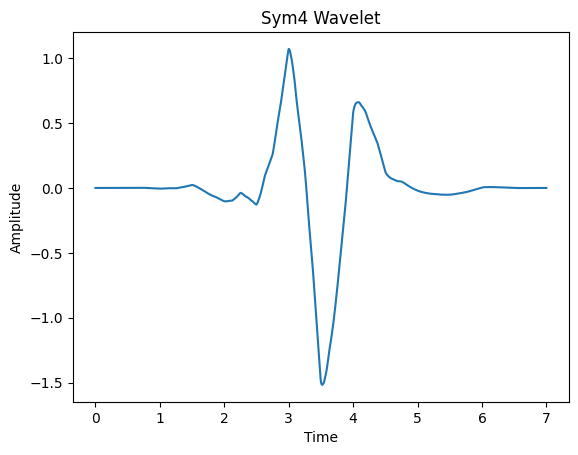

In [10]:
plt.plot(x, psi)
plt.title('Sym4 Wavelet')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [11]:
influx = {'ip':'http://172.22.112.251', 'db':'shake',
                  'user':'algtest', 'passw':'sensorweb711', 
                  'ssl':False}

In [12]:
unit = '11:01:11:01:11:01'
table_name = 'Z'

In [13]:
scg = np.random.randint(low=0, high=101, size=1000)

In [14]:
scg = scg.tolist()

In [15]:
scg[:10]

[74, 45, 52, 18, 60, 0, 77, 24, 46, 57]

In [16]:
# write_influx(influx= influx, unit=unit,table_name=table_name, data_name='value', data=scg, start_timestamp=1736862357, fs = 1/100)

In [33]:
def sine_gen (amp, samples, hr, duration):
    frequency = 1      # Frequency in Hz
    amplitude = amp       # Amplitude of the sine wave
    sampling_rate = samples # Sampling rate in Hz
    duration = 1        # Duration in seconds
    # Generate the time axis
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

    # Generate the sine wave
    sine_wave = amplitude * np.sin(2 * np.pi * frequency * t)
    sine_wave = np.tile(sine_wave,int(hr/6))     
    return sine_wave

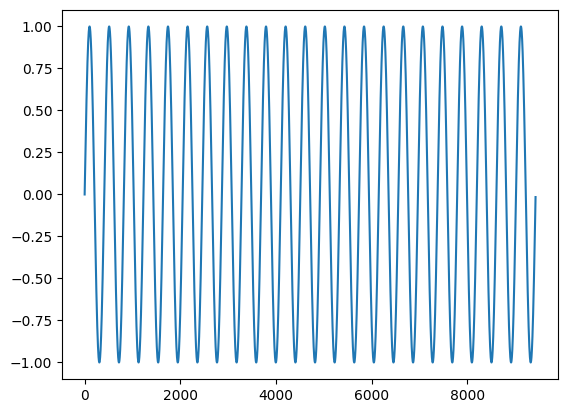

In [35]:
b = sine_gen(amp=1, samples= 410, hr = 140, duration=1)
plt.plot(b)

In [43]:
b.shape

(9430,)

In [44]:
def rr_gen(respiratory_rate):
    fs = 9430  # Sampling frequency in Hz
    duration = 1  # Signal duration in seconds
    f_resp = respiratory_rate  # Respiration frequency in Hz (15 breaths per minute)

    # Time vector
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)

    # Respiration signal (sinusoidal)
    amplitude = 1.0  # Amplitude of the signal
    resp_signal = amplitude * np.sin(2 * np.pi * f_resp * t)

    return resp_signal

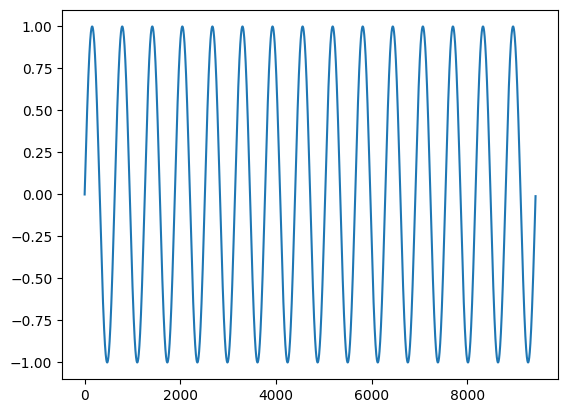

In [45]:
a = rr_gen(15)
plt.plot(a)

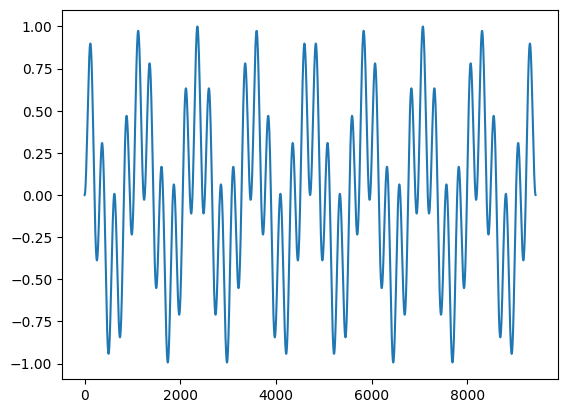

In [48]:
c = a*b
plt.plot(c)

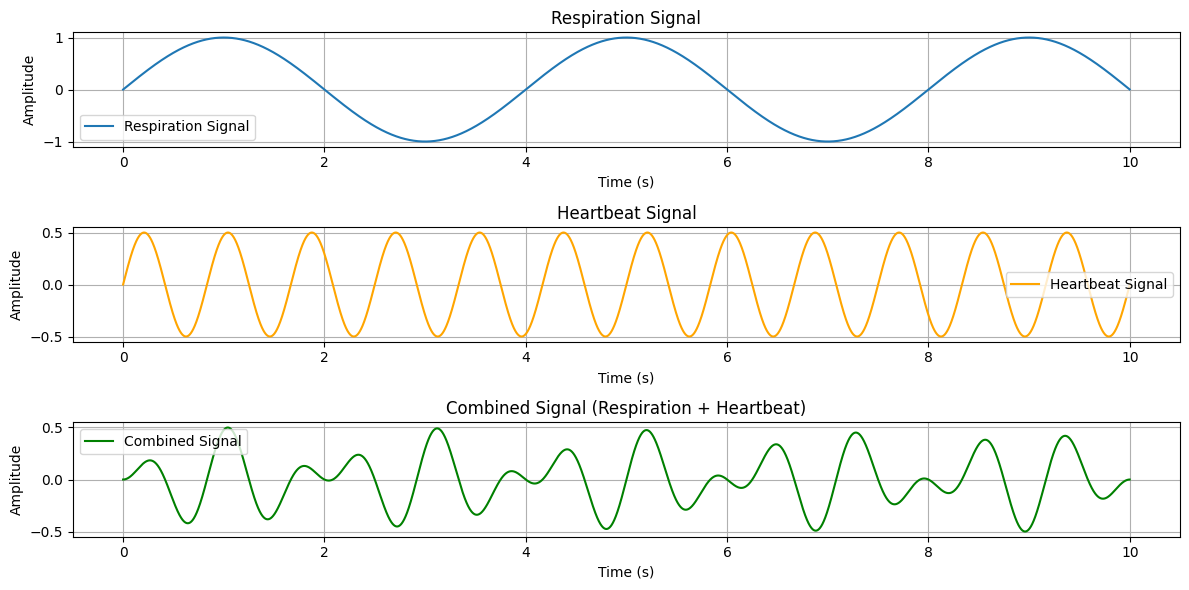

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency in Hz
duration = 10  # Signal duration in seconds

# Respiration signal parameters
f_resp = 0.25  # Respiration frequency in Hz (15 breaths per minute)
amplitude_resp = 1.0  # Amplitude of the respiration signal

# Heartbeat signal parameters
f_heartbeat = 1.2  # Heartbeat frequency in Hz (~72 beats per minute)
amplitude_heartbeat = 0.5  # Amplitude of the heartbeat signal

# Time vector
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Respiration signal (sinusoidal)
resp_signal = amplitude_resp * np.sin(2 * np.pi * f_resp * t)

# Heartbeat signal (sinusoidal)
heartbeat_signal = amplitude_heartbeat * np.sin(2 * np.pi * f_heartbeat * t)

# Combined signal
combined_signal = resp_signal * heartbeat_signal

# Plot the signals
plt.figure(figsize=(12, 6))

# Plot respiration signal
plt.subplot(3, 1, 1)
plt.plot(t, resp_signal, label='Respiration Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Respiration Signal')
plt.grid()
plt.legend()

# Plot heartbeat signal
plt.subplot(3, 1, 2)
plt.plot(t, heartbeat_signal, label='Heartbeat Signal', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Heartbeat Signal')
plt.grid()
plt.legend()

# Plot combined signal
plt.subplot(3, 1, 3)
plt.plot(t, combined_signal, label='Combined Signal', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Combined Signal (Respiration + Heartbeat)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
group = 

In [50]:
def send_vital_result(group, mac,timestamp, hr, rr, bph, bpl, movement, occupancy, occ_timestamp, alert, alert_timestamp):
    topic="/" + group + "/" + mac + "/vital"
 
    payload ="timestamp=" + str(timestamp)

    if hr != -1:
        payload += "; heartrate=" + str(hr) 
    if rr != -1:
        payload += "; respiratoryrate=" + str(rr) 
    if bph != -1:
        payload += "; systolic=" + str(bph) 
    if bpl != -1:
        payload += "; diastolic=" + str(bpl) 
    
    if movement != -1:
        payload += "; movement=" + str(movement)
    
    for index, oc in enumerate(occupancy):
        payload += "; timestamp=" + str(occ_timestamp + index*10**9) # assuming timestamp in nano seconds
        payload += "; occupancy=" + str(occupancy[index])
    
    if alert != -1:
        payload += "; timestamp=" + str(alert_timestamp) + "; alert=" + str(alert)

    if not DRY_RUN_MODE:
        mqtt_dedicated_pubish.publish(topic, payload, qos=1)
        if debug:
            global mqtt_publishing_cnt
            mqtt_publishing_cnt +=1
            if mqtt_publishing_cnt % 100 ==0:
                print(f"mqtt_publishing_cnt={mqtt_publishing_cnt}")
    else:
        # print(topic)
        pass
    return

In [23]:
def sine_gen_with_rr (amp, samples, hb, freq, rr):
    freq_hr = freq       # Frequency in Hz
    freq_rr = rr/60
    hr_amp = amp       # Amplitude of the sine wave
    rr_amp = 0.2*hr_amp
    sampling_rate = samples # Sampling rate in Hz
    duration = 1        # Duration in seconds
    
    # Generate the time axis
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

    # Generate the sine wave
    rr_wave = rr_amp + (rr_amp*np.sin(2 * np.pi * freq_rr * t))
    hr_wave = hr_amp + (hr_amp * np.sin(2 * np.pi * freq_hr * t))
    
    sine_wave = rr_wave + hr_wave 
    return sine_wave

In [24]:
a = sine_gen_with_rr (1024, 410, 1, 2.2, 15)

In [26]:
k = [1228, 1266, 1303, 1340, 1377, 1414, 1451, 1487, 1524, 1559, 1595, 1629, 1664, 1698, 1731, 1763, 1795, 1826, 1857, 1887, 1915, 1943, 1971, 1997, 2022, 2046, 2069, 2091, 2113, 2133, 2151, 2169, 2186, 2201, 2215, 2228, 2240, 2250, 2259, 2267, 2273, 2279, 2283, 2285, 2287, 2287, 2285, 2283, 2279, 2274, 2267, 2259, 2250, 2240, 2229, 2216, 2202, 2187, 2171, 2153, 2134, 2115, 2094, 2072, 2049, 2026, 2001, 1975, 1949, 1921, 1893, 1864, 1834, 1804, 1772, 1741, 1708, 1675, 1642, 1608, 1574, 1539, 1504, 1469, 1434, 1398, 1363, 1327, 1291, 1255, 1219, 1183, 1148, 1112, 1077, 1042, 1008, 974, 940, 907, 874, 842, 810, 779, 749, 719, 691, 662, 635, 609, 583, 559, 535, 513, 491, 471, 451, 433, 416, 400, 385, 371, 359, 347, 337, 329, 321, 315, 310, 307, 304, 303, 304, 305, 308, 312, 318, 325, 333, 342, 353, 365, 378, 392, 408, 425, 442, 461, 482, 503, 525, 549, 573, 598, 625, 652, 680, 709, 739, 769, 801, 833, 865, 898, 932, 967, 1001, 1037, 1072, 1108, 1145, 1181, 1218, 1255, 1292, 1329, 1367, 1404, 1441, 1478, 1515, 1552, 1588, 1624, 1660, 1695, 1730, 1765, 1799, 1832, 1865, 1897, 1929, 1960, 1990, 2019, 2047, 2075, 2102, 2127, 2152, 2176, 2198, 2220, 2240, 2260, 2278, 2295, 2311, 2326, 2340, 2352, 2363, 2373, 2381, 2388, 2394, 2399, 2402, 2404, 2405, 2405, 2403, 2399, 2395, 2389, 2382, 2374, 2364, 2353, 2341, 2328, 2313, 2297, 2280, 2262, 2243, 2223, 2201, 2179, 2156, 2131, 2106, 2080, 2053, 2025, 1996, 1966, 1936, 1905, 1873, 1841, 1808, 1775, 1741, 1707, 1672, 1637, 1602, 1566, 1531, 1495, 1459, 1422, 1386, 1350, 1314, 1278, 1242, 1206, 1171, 1136, 1101, 1067, 1033, 999, 966, 934, 902, 871, 841, 811, 782, 754, 726, 700, 674, 650, 626, 603, 582, 561, 542, 523, 506, 490, 475, 462, 449, 438, 428, 419, 412, 405, 400, 397, 395, 394, 394, 395, 398, 403, 408, 415, 423, 432, 443, 455, 468, 482, 498, 514, 532, 551, 571, 592, 615, 638, 662, 687, 713, 741, 768, 797, 827, 857, 888, 920, 952, 985, 1019, 1053, 1087, 1122, 1158, 1193, 1229, 1266, 1302, 1339, 1375, 1412, 1449, 1486, 1522, 1559, 1595, 1632, 1667, 1703, 1738, 1773, 1808, 1842, 1875, 1908, 1940, 1971, 2002, 2032, 2062, 2090, 2118, 2145, 2171, 2196, 2220, 2243, 2265, 2285, 2305, 2324, 2341, 2358, 2373, 2387, 2399, 2411, 2421, 2430, 2438, 2444, 2449, 2453, 2456, 2457, 2457, 2455, 2452, 2448, 2443, 2436, 2428, 2419, 2409, 2397, 2384, 2370, 2354]

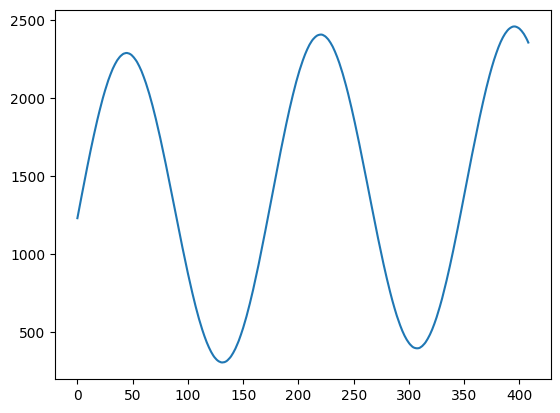

In [27]:
plt.plot(k)